In [2]:
import numpy as np
import numpy.linalg as la
import matplotlib.pyplot as plt
%matplotlib inline

params = {'legend.fontsize': 20,
          'figure.figsize': (12, 6),
          'axes.labelsize': 20,
          'axes.titlesize': 20,
          'xtick.labelsize': 20,
          'ytick.labelsize': 20,
          'lines.linewidth': 3,
          'legend.frameon': False}
plt.rcParams.update(params)

# Set up a problem

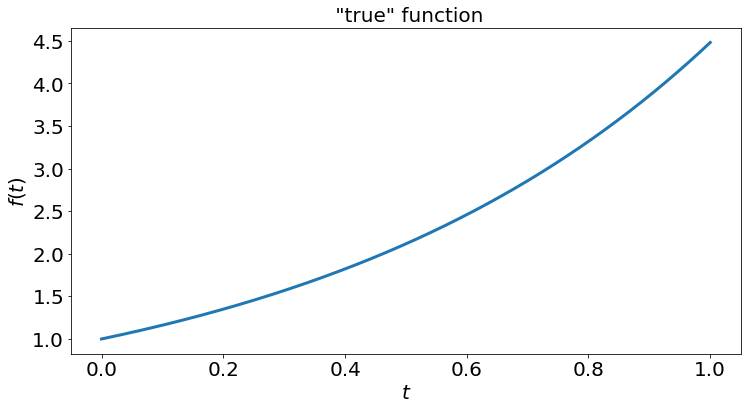

In [3]:
def f(t):
    return np.exp(1.5*t)

t_01 = np.linspace(0, 1, 1000)
plt.plot(t_01, f(t_01))
plt.xlabel('$t$')
plt.ylabel('$f(t)$')
plt.title(' "true" function')
plt.legend()

# Make a function to return the interpolant

In [8]:
def make_interpolant(a, h, degree, f):
    # create some nodes
    nodes = a + np.linspace(-h/2, h/2, degree+1)
    #print("nodes = ",nodes)
    
    # make the Vandermonde matrix
    V = np.array([
    nodes**i
    for i in range(degree+1)
]).T
    
    # solve for the coefficients
    coeffs = la.solve(V, f(nodes))
    #print("coefficients = ",coeffs)
    
    return coeffs

In [9]:
c = make_interpolant(0.5, 1, 4, f)

In [10]:
c = make_interpolant(0.5, 0.1, 4, f)

# Set up a test

In this test we're going to select an $h$ and select a polynomial interpolant degree.

Notice what happens when you reduce $h$ or increase p!

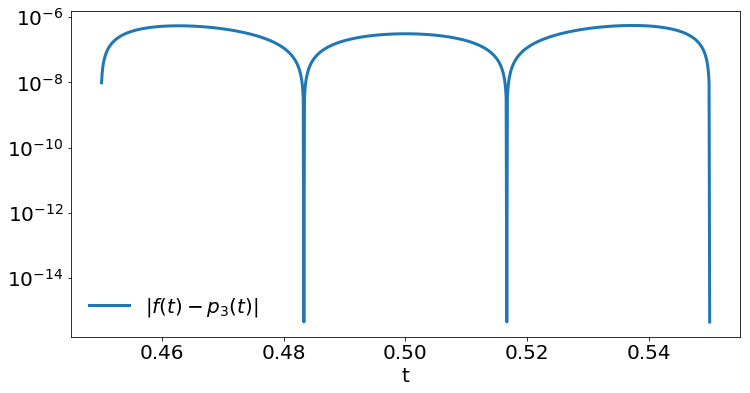

In [11]:
h = 0.1
degree = 3
a = 0.5

# Here we create many other points in the same interval 
# They are NOT the points used to obtain the interpolant!
t_0h = a+np.linspace(-h/2, h/2, 1000)

# Get the coefficients for the interpolant
c = make_interpolant(a, h, degree, f)

# make the interpolant (as a function)
def p(x):
    interp = 0*x
    for i in range(degree+1):
        interp += c[i] * x**i
    return interp

# Obtain the error = true - interpolation                   
error = np.abs(f(t_0h) - p(t_0h)) 

plt.semilogy(t_0h, error , label='$|f(t) - p_{%s}(t)|$'%degree)
plt.xlabel('t')
plt.legend()

# Test Error Convergence in $h$

Does the error behave like
$$
e \sim h^{\alpha}
$$
for some $\alpha$?

Experiment details:

* Fix a degree

* Create a list of $h$ values

* Measure the error (maximum) for each $h$ value

* Look at the slope of errors versus $h$ in log-log

In [12]:
hlist = 1 / 2**(np.arange(0,12))

In [13]:
hlist

array([  1.00000000e+00,   5.00000000e-01,   2.50000000e-01,
         1.25000000e-01,   6.25000000e-02,   3.12500000e-02,
         1.56250000e-02,   7.81250000e-03,   3.90625000e-03,
         1.95312500e-03,   9.76562500e-04,   4.88281250e-04])

In [15]:
# Fix the polynomial degree and vary the interval h. 
errors = []
degree = 3
a = 0.5

for h in hlist:
    # Create many other points in the same interval for plotting
    t_0h = a+np.linspace(-h/2, h/2, 1000)

    c = make_interpolant(a, h, degree, f)
     
    e = np.abs(f(t_0h) - p(t_0h)).max()
    
    errors.append(e)
    
errors = np.array(errors)

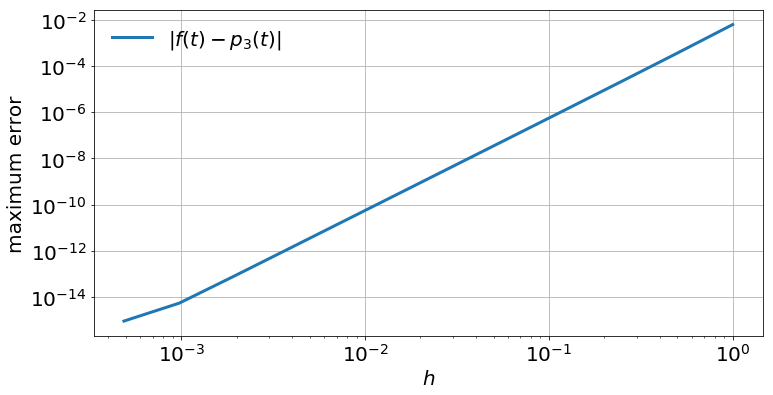

In [17]:
plt.loglog(hlist, errors, label='$|f(t) - p_%s(t)|$'%degree)
plt.grid(True)
plt.xlabel('$h$')
plt.ylabel('maximum error')
plt.legend()

# Test Error Convergence in degree $p$

Does the error behave like
$$
e \sim p^{-\alpha}
$$
for some $\alpha$?  (...no)

Experiment details:

* Fix an $h$

* Create a list of $p$ values

* Measure the error (maximum) for each $p$ value

* Look at the slope of errors versus $p$ in log-log

In [18]:
plist = np.arange(1,8)

In [19]:
# Fix the interval length h and vary the polynomial degree. 
errors = []
h = 1
a = 0.5

for degree in plist:
    t_0h = a+np.linspace(-h/2, h/2, 1000)

    c = make_interpolant(a, h, degree, f)
    
    e = np.abs(f(t_0h) - p(t_0h)).max()
    errors.append(e)
    
errors = np.array(errors)

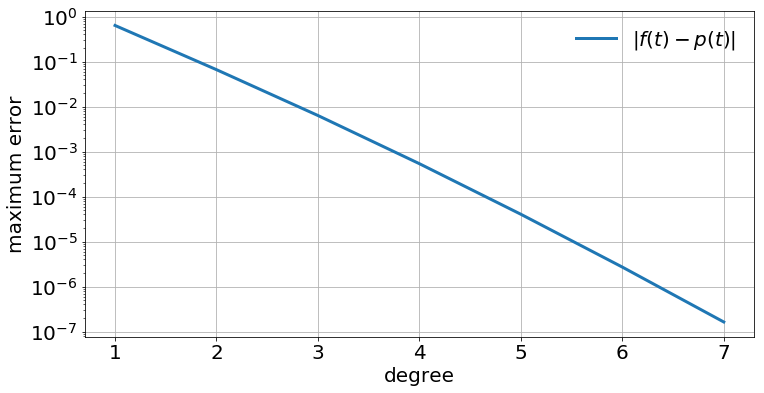

In [20]:
plt.semilogy(plist, errors, label='$|f(t) - p(t)|$'%degree)
plt.grid(True)
plt.xlabel('degree')
plt.ylabel('maximum error')
plt.legend()